In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel("./data/Dengue 2001-2024.xlsx")

data.set_index("Year")

FileNotFoundError: [Errno 2] No such file or directory: './data/Dengue 2001-2024.xlsx'

In [8]:
data.head()

,Year,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
0,2001,136578600,1049,32505706,104072893,33.24,18.28,139.92,2198.86,73.42,25.94,2430,44
1,2002,138612896,1065,33960159,104652737,33.44,17.68,156.25,2127.61,73.17,25.82,6232,58
2,2003,140647193,1080,35443092,105204100,33.52,18.08,141.08,2159.29,73.67,25.75,486,10
3,2004,142681489,1096,36954505,105726983,33.55,18.02,195.58,2112.04,72.67,25.88,3934,14
4,2005,144715786,1112,38494399,106221386,33.67,18.73,219.75,2092.13,72.83,26.24,1048,4


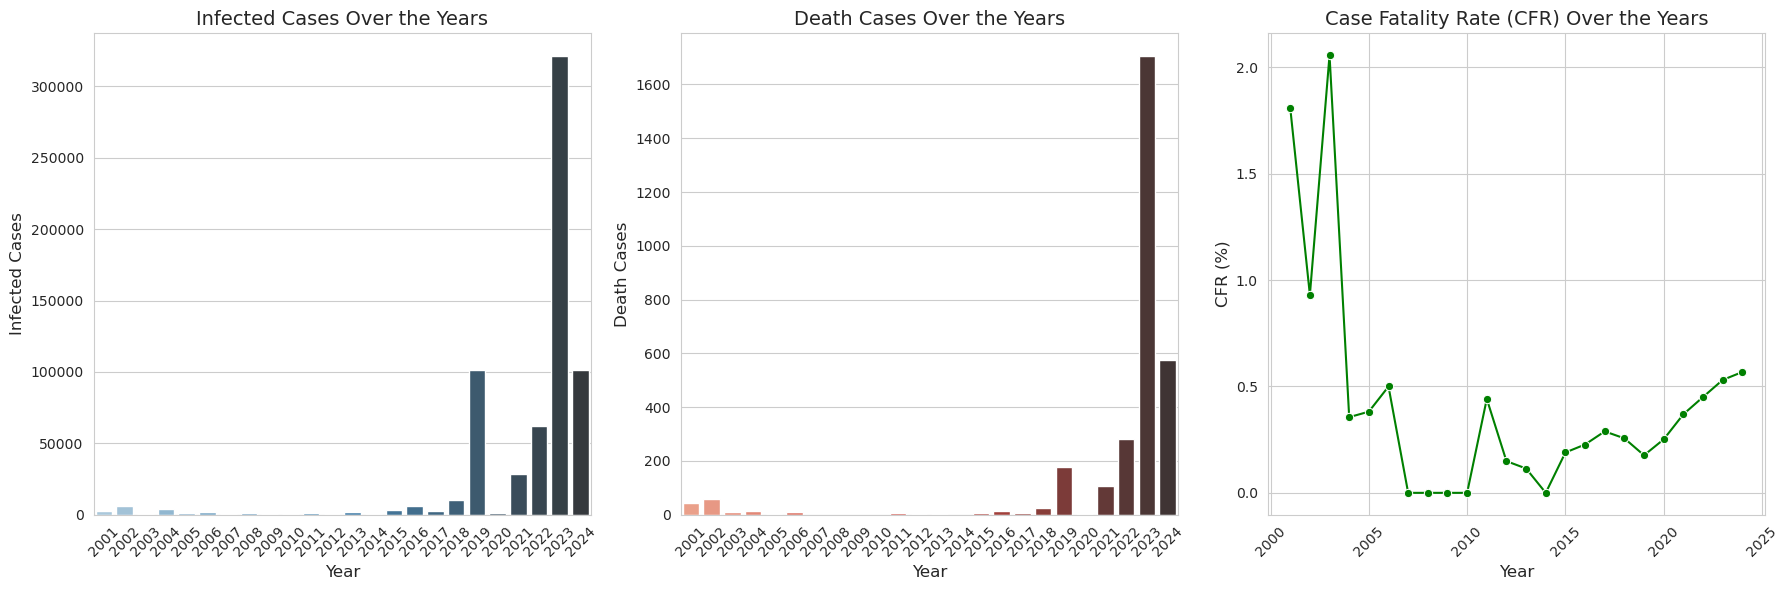

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by calculating CFR if not already done
data['CFR'] = (data['Death'] / data['Infected']) * 100

# Create a figure with 3 subplots for Infected, Death, and CFR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Infected cases
sns.barplot(data=data, x='Year', y='Infected', palette='Blues_d', ax=axes[0])
axes[0].set_title('Infected Cases Over the Years', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Infected Cases', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Death cases
sns.barplot(data=data, x='Year', y='Death', palette='Reds_d', ax=axes[1])
axes[1].set_title('Death Cases Over the Years', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Death Cases', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Line plot for CFR
sns.lineplot(data=data, x='Year', y='CFR', marker='o', color='green', ax=axes[2])
axes[2].set_title('Case Fatality Rate (CFR) Over the Years', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('CFR (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is the dataset with columns: Year, Jan., Feb., ..., Dec., Infected, Death.

# Prepare data for seasonal decomposition
monthly_columns = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
df_long = data.melt(id_vars=['Year'], value_vars=monthly_columns, 
                    var_name='Month', value_name='Cases')

# Remove periods from month names
df_long['Month'] = df_long['Month'].str.replace('.', '', regex=False)

# Convert month names to proper format
df_long['Month'] = df_long['Month'].apply(lambda x: x[:3].capitalize())

# Create a proper datetime index
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'], format='%Y-%b')
df_long = df_long.sort_values('Date').set_index('Date')

# Prepare time series for Infected and Death
infected_series = df_long['Cases'].groupby(df_long.index).sum()  # Summing monthly cases

# Create a proper datetime index for death_series
death_series = data.set_index('Year').loc[2001:2024, 'Death']
death_series.index = pd.to_datetime(death_series.index, format='%Y')
death_series = death_series.reindex(infected_series.index, method='ffill')

# Perform seasonal decomposition
infected_decompose = seasonal_decompose(infected_series, model='additive', period=12)
death_decompose = seasonal_decompose(death_series, model='additive', period=12)

# Plot the results in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Plot for Infected cases
infected_decompose.observed.plot(ax=axes[0, 0], title='Infected - Observed', color='blue')
infected_decompose.trend.plot(ax=axes[1, 0], title='Infected - Trend', color='blue')
infected_decompose.seasonal.plot(ax=axes[2, 0], title='Infected - Seasonal', color='blue')

# Plot for Death cases
death_decompose.observed.plot(ax=axes[0, 1], title='Deaths - Observed', color='red')
death_decompose.trend.plot(ax=axes[1, 1], title='Deaths - Trend', color='red')
death_decompose.seasonal.plot(ax=axes[2, 1], title='Deaths - Seasonal', color='red')

fig.suptitle('Seasonal Decomposition of Infected and Death Cases', fontsize=16)
# Adjust layout and show plot
plt.tight_layout()
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']"

NameError: name 'data' is not defined

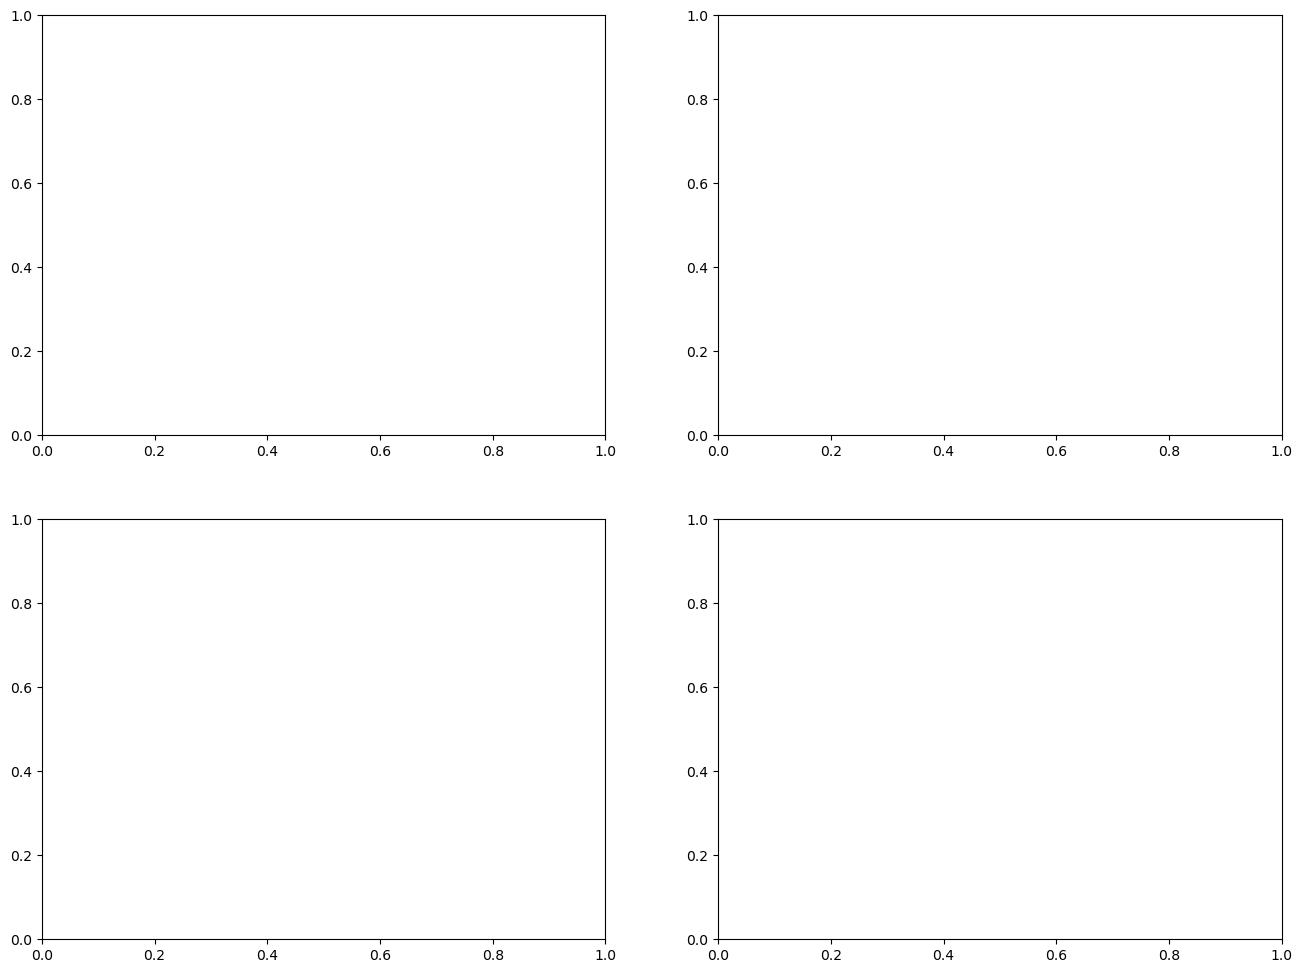

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set a consistent style
sns.set_style('whitegrid')

# Plot Max T trend
sns.lineplot(ax=axes[0, 0], x='Year', y='Tmax', data=data, color='blue', marker='o')
axes[0, 0].set_title('Trend of Maximum Temperature Over Years', fontsize=16, pad=10)
axes[0, 0].set_xlabel('Year', fontsize=14)
axes[0, 0].set_ylabel('Maximum Temperature (°C)', fontsize=14)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Min T trend
sns.lineplot(ax=axes[0, 1], x='Year', y='Tmin', data=data, color='green', marker='o')
axes[0, 1].set_title('Trend of Minimum Temperature Over Years', fontsize=16, pad=10)
axes[0, 1].set_xlabel('Year', fontsize=14)
axes[0, 1].set_ylabel('Minimum Temperature (°C)', fontsize=14)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Plot Humidity trend
sns.lineplot(ax=axes[1, 0], x='Year', y='Relative Humidity', data=data, color='orange', marker='o')
axes[1, 0].set_title('Trend of Humidity Over Years', fontsize=16, pad=10)
axes[1, 0].set_xlabel('Year', fontsize=14)
axes[1, 0].set_ylabel('Humidity (%)', fontsize=14)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Rainfall trend
sns.lineplot(ax=axes[1, 1], x='Year', y='Rainfall', data=data, color='purple', marker='o')
axes[1, 1].set_title('Trend of Rainfall Over Years', fontsize=16, pad=10)
axes[1, 1].set_xlabel('Year', fontsize=14)
axes[1, 1].set_ylabel('Rainfall (mm)', fontsize=14)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout for better display
plt.tight_layout()
plt.show()

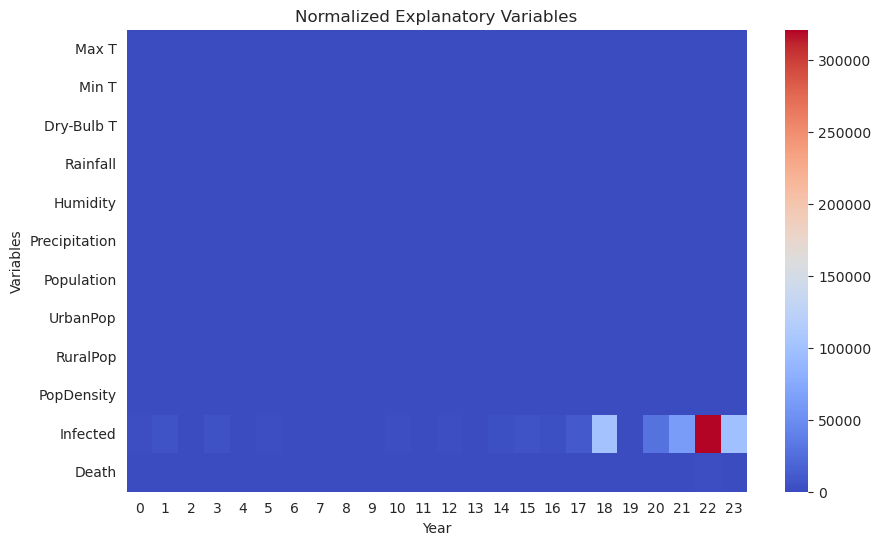

In [69]:
normalized_data = data[
    [
        "Max T",
        "Min T",
        "Dry-Bulb T",
        "Rainfall",
        "Humidity",
        "Precipitation",
        "Population",
        "UrbanPop",
        "RuralPop",
        "PopDensity",
    ]
].apply(pd.to_numeric)

normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data["Infected"] = data["Infected"]

# Add the Death column to normalized data for better comparison
normalized_data["Death"] = data["Death"]

# Display the normalized data
normalized_data.head().reset_index(drop=True)

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")

# Display the plot
plt.show()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize the data
normalized_data = data[
    [
        "Max T",
        "Min T",
        "Dry-Bulb T",
        "Rainfall",
        "Humidity",
        "Precipitation",
        "Population",
        "UrbanPop",
        "RuralPop",
        "PopDensity",
    ]
].apply(pd.to_numeric)

# Standardize the data
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Clip extreme values to improve visualization
normalized_data = normalized_data.clip(lower=-3, upper=3)

# Add the Infected and Death columns back for comparison
normalized_data["Infected"] = data["Infected"]
normalized_data["Death"] = data["Death"]

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()

# Create the pairplot
pairplot = sns.pairplot(
    normalized_data,
    hue='Infected',
    kind='scatter',
    diag_kind='hist',  # Use histograms for diagonal plots
    palette='Spectral',
    height=2.5,
    aspect=1.2
)

# Define a dictionary to update axis labels
axis_label_map = {
    "Max T": "Max T\n(°C)",
    "Min T": "Min T\n(°C)",
    "Dry-Bulb T": "Dry-Bulb T\n(°C)",
    "Rainfall": "Rainfall\n(mm)",
    "Humidity": "Humidity\n(%)",
    "Precipitation": "Precipitation\n(mm)",
    "RuralPop": "Rural\nPopulation",
    "UrbanPop": "Urban\nPopulation",
    "PopDensity": "Density\n(P/Km²)",
}

# Update axis labels in the pairplot
for ax_row in pairplot.axes:
    for ax in ax_row:
        if ax:  # Check if axis exists
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            # Update x-axis label if in the map
            if x_label and x_label in axis_label_map:
                ax.set_xlabel(axis_label_map[x_label])
            # Update y-axis label if in the map
            if y_label and y_label in axis_label_map:
                ax.set_ylabel(axis_label_map[y_label])

# Adjust axis limits for better visualization of standardized data
# for ax_row in pairplot.axes:
#     for ax in ax_row:
#         if ax:  # Check if axis exists
#             ax.set_xlim(-1, 1)
#             ax.set_ylim(-1, 1)

for ax in pairplot.axes.flatten():
    if ax:  # Check if axis exists
        ax.set_xlabel(ax.get_xlabel(), fontsize=18, fontweight='bold')
        ax.set_ylabel(ax.get_ylabel(), fontsize=18, fontweight='bold')
        ax.tick_params(axis='both', labelsize=18)  # Increase tick label size

# Add a legend to the pairplot
pairplot.legend.set_title("Infected", prop={'size': 14, 'weight': 'bold'})
pairplot.legend.set_bbox_to_anchor((1, 1))  # Move legend outside the plot
for text in pairplot.legend.texts:
    text.set_fontsize(12)  # Adjust legend font size

# Add a main title
plt.suptitle('Pairwise Plot of Normalized Explanatory Variables',
             fontsize=18, fontweight='bold', y=1.02)

# Adjust layout for better display
plt.tight_layout()

# Display the pairplot
plt.show()


KeyError: "['Max T', 'Min T', 'Dry-Bulb T', 'Humidity', 'UrbanPop', 'RuralPop', 'PopDensity'] not in index"

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the mapping for axis label updates
axis_label_map = {
    "Max T": "Max T (°C)",
    "Min T": "Min T (°C)",
    "Dry-Bulb T": "Dry-Bulb T (°C)",
    "Rainfall": "Rainfall (mm)",
    "Humidity": "Humidity (%)",
    "Precipitation": "Precipitation (mm)",
    "RuralPop": "Rural Population",
    "UrbanPop": "Urban Population",
    "PopDensity": "Population Density"
}

# Step 2: Update correlation matrix labels
correlation_matrix = normalized_data.corr()
correlation_matrix.rename(index=axis_label_map, columns=axis_label_map, inplace=True)

# Step 3: Plot the updated correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Explanatory Variables and Infections", fontsize=14, fontweight="bold")

# # Save the plot as PNG for PDF
# plt.savefig('imagesFinal/correlation_matrix.png', dpi=220, format='png', bbox_inches='tight')

# # Save the plot as EPS for LaTeX
# plt.savefig('imagesFinal/correlation_matrix.eps', dpi=220, format="eps", bbox_inches="tight")

# Display the plot
plt.show()

NameError: name 'normalized_data' is not defined

In [21]:
sns.pairplot(normalized_data,
    kind='scatter', 
    diag_kind='kde', 
    palette='coolwarm', 
    height=2,
    aspect=1.2
)
plt.show()


NameError: name 'normalized_data' is not defined